EXP - 9 Build the K-means clustering model on market segmentation dataset

In [1]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
df = pd.read_csv('store.csv')

In [2]:
print(df.head());

     reps product  qty  revenue region
0  Chitra  Galaxy    2   155.10   West
1   Vijay     Jet    2    39.30  North
2    Mala  Beacon    3    74.25   West
3   Suman   Alpen    3   100.98  North
4  Rachna   Orbit    2    44.98  North


In [3]:
from sklearn.preprocessing import StandardScaler
X = df[['qty', 'revenue']].copy()

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

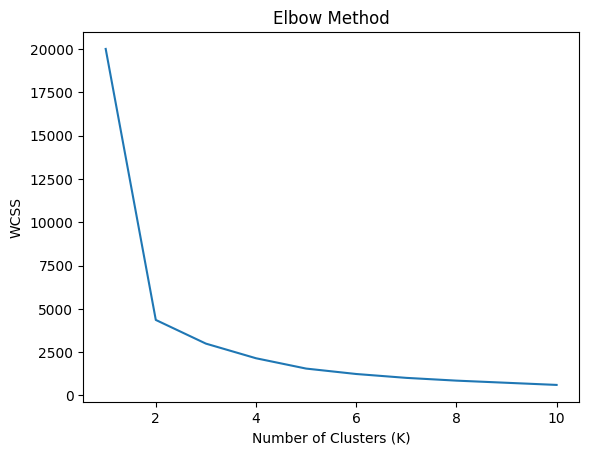

In [4]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.show()

In [5]:
optimal_k = 3

kmeans = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42, n_init=10)
kmeans.fit(X_scaled)

df['cluster_label'] = kmeans.labels_

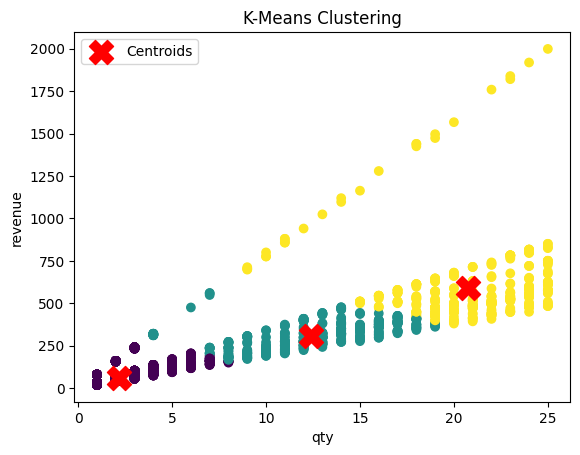

In [6]:
plt.scatter(df['qty'], df['revenue'], c=df['cluster_label'], cmap='viridis')
plt.scatter(scaler.inverse_transform(kmeans.cluster_centers_)[:, 0],
            scaler.inverse_transform(kmeans.cluster_centers_)[:, 1],
            s=300, c='red', marker='X', label='Centroids')
plt.title('K-Means Clustering')
plt.xlabel('qty')
plt.ylabel('revenue')
plt.legend()
plt.show()